In [1]:
import sys
sys.path.append("..")
import torch
from diffusers import UNet2DModel, DDIMScheduler, DDPMPipeline
import matplotlib.pyplot as plt
from fixer.models import *
torch.cuda.set_device(0)

/home/antonxue/lib/miniconda3/envs/arpro/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model_path = "../_dump/fixer_diffusion_visa_pcb4_best.pt"
model_dict = torch.load(model_path)['model_state_dict']
mydiff = MyDiffusionModel(image_size=512)
mydiff.load_state_dict(model_dict)
mydiff.eval().cuda();

In [3]:
xgens = mydiff(batch_size=8, progress_bar=True, num_inference_steps=1000)

100%|██████████| 1000/1000 [08:53<00:00,  1.88it/s]


In [4]:
# plt.clf()
# fig, ax = plt.subplots(1, 1)
# xi = xgens[0].cpu().detach() * 0.5 + 0.5
# ax.imshow(xi.numpy().transpose(1,2,0))

<Figure size 640x480 with 0 Axes>

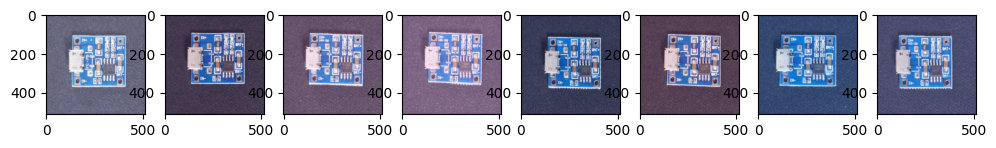

In [5]:
plt.clf()
fig, ax = plt.subplots(1, 8, figsize=(12, 8))
for i in range(8):
    xi = xgens[i].cpu().detach() * 0.5 + 0.5
    ax[i].imshow(xi.numpy().transpose(1,2,0))

In [6]:
model_path = "../_dump/fixer_diffusion_mvtec_bottle_best.pt"
model_dict = torch.load(model_path)['model_state_dict']
mydiff = MyDiffusionModel()
mydiff.load_state_dict(model_dict)
mydiff.eval().cuda();

In [7]:
xgens = mydiff(batch_size=8, progress_bar=True, num_inference_steps=1000)

100%|██████████| 1000/1000 [02:07<00:00,  7.83it/s]


In [8]:
xgens.shape

torch.Size([8, 3, 256, 256])

<Figure size 640x480 with 0 Axes>

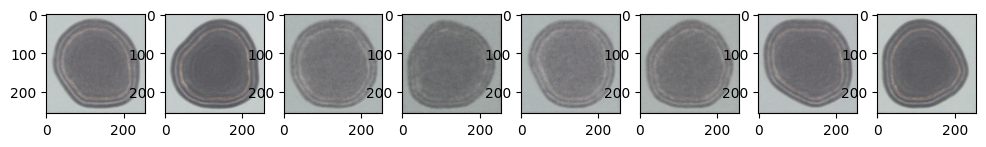

In [9]:
plt.clf()
fig, ax = plt.subplots(1, 8, figsize=(12, 8))
for i in range(8):
    xi = 0.5*xgens[i].cpu().detach()+0.5
    ax[i].imshow(xi.numpy().transpose(1,2,0))

In [10]:
model_path = "../_dump/fixer_diffusion_mvtec_transistor_best.pt"
model_dict = torch.load(model_path)['model_state_dict']
mydiff = MyDiffusionModel()
mydiff.load_state_dict(model_dict)
mydiff.eval().cuda();
xgens = mydiff(batch_size=8, progress_bar=True, num_inference_steps=1000)
plt.clf()
fig, ax = plt.subplots(1, 8, figsize=(12, 8))
for i in range(8):
    xi = 0.5*xgens[i].cpu().detach()+0.5
    ax[i].imshow(xi.numpy().transpose(1,2,0))

 94%|█████████▍| 941/1000 [02:00<00:07,  7.82it/s]


KeyboardInterrupt: 

 30%|███       | 304/1000 [00:38<01:28,  7.89it/s]

100%|██████████| 1000/1000 [02:06<00:00,  7.91it/s]


<Figure size 640x480 with 0 Axes>

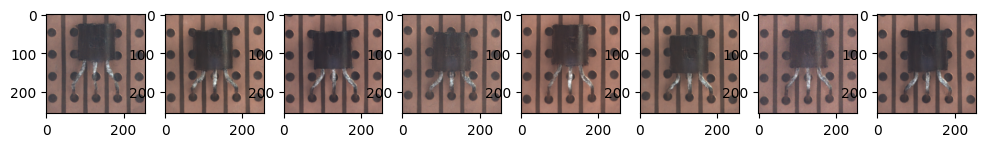

In [ ]:
model_path = "../_dump/fixer_diffusion_mvtec_transistor_best.pt"
model_dict = torch.load(model_path)['model_state_dict']
mydiff = MyDiffusionModel()
mydiff.load_state_dict(model_dict)
mydiff.eval().cuda();
xgens = mydiff(batch_size=8, progress_bar=True, num_inference_steps=1000)
plt.clf()
fig, ax = plt.subplots(1, 8, figsize=(12, 8))
for i in range(8):
    xi = 0.5*xgens[i].cpu().detach()+0.5
    ax[i].imshow(xi.numpy().transpose(1,2,0))

In [ ]:
mydiff = MyDiffusionModel()
mydiff.eval().cuda();

In [ ]:
unet = UNet2DModel(sample_size=256)
scheduler = DDIMScheduler()
pipeline = DDPMPipeline(unet, scheduler)

In [ ]:
t = torch.randint(0, mydiff.num_timesteps, (1,))

In [ ]:
x_noised = mydiff.add_noise(x, eps, t)

NameError: name 'x' is not defined

In [ ]:
(x_noised[0] - x_noised[1]).abs().sum()

tensor(0.)

In [ ]:
# out = mydiff(x.cuda(), t.cuda(), num_inference_steps=10, enable_grad=False, progress_bar=True)

In [ ]:
scheduler.num_inference_steps

In [ ]:
import torch
torch.linspace(0, 1, 100)

tensor([0.0000, 0.0101, 0.0202, 0.0303, 0.0404, 0.0505, 0.0606, 0.0707, 0.0808,
        0.0909, 0.1010, 0.1111, 0.1212, 0.1313, 0.1414, 0.1515, 0.1616, 0.1717,
        0.1818, 0.1919, 0.2020, 0.2121, 0.2222, 0.2323, 0.2424, 0.2525, 0.2626,
        0.2727, 0.2828, 0.2929, 0.3030, 0.3131, 0.3232, 0.3333, 0.3434, 0.3535,
        0.3636, 0.3737, 0.3838, 0.3939, 0.4040, 0.4141, 0.4242, 0.4343, 0.4444,
        0.4545, 0.4646, 0.4747, 0.4848, 0.4949, 0.5051, 0.5152, 0.5253, 0.5354,
        0.5455, 0.5556, 0.5657, 0.5758, 0.5859, 0.5960, 0.6061, 0.6162, 0.6263,
        0.6364, 0.6465, 0.6566, 0.6667, 0.6768, 0.6869, 0.6970, 0.7071, 0.7172,
        0.7273, 0.7374, 0.7475, 0.7576, 0.7677, 0.7778, 0.7879, 0.7980, 0.8081,
        0.8182, 0.8283, 0.8384, 0.8485, 0.8586, 0.8687, 0.8788, 0.8889, 0.8990,
        0.9091, 0.9192, 0.9293, 0.9394, 0.9495, 0.9596, 0.9697, 0.9798, 0.9899,
        1.0000])